In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [5]:
df = pd.read_csv("./data/sensor-data.txt",delimiter="\t",header=6)

In [6]:
df.head()

,Time[s],Intensity[a.u.]
0,[1],11.817864
1,[2],11.797914
2,[3],11.797964
3,[4],11.778014
4,[5],11.818065


In [7]:
df["Time[s]"] = df["Time[s]"].apply(lambda x: float(x[1:-1]))

In [8]:
df.head()

,Time[s],Intensity[a.u.]
0,1.0,11.817864
1,2.0,11.797914
2,3.0,11.797964
3,4.0,11.778014
4,5.0,11.818065


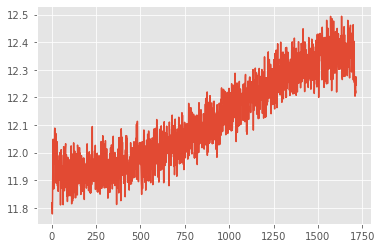

In [10]:
plt.plot(df["Time[s]"],df["Intensity[a.u.]"])

In [11]:
data = df["Intensity[a.u.]"][:250]

In [12]:
data

0      11.817864
1      11.797914
2      11.797964
3      11.778014
4      11.818065
5      11.888115
6      11.998166
7      12.048217
8      12.048269
9      11.978320
10     11.948372
11     11.868423
12     11.938475
13     12.008527
14     11.958579
15     11.968632
16     12.078684
17     12.088737
18     12.028790
19     12.038843
20     11.998896
21     11.978950
22     11.959003
23     12.069057
24     11.919111
25     11.889165
26     11.999220
27     11.929274
28     11.939329
29     11.929384
         ...    
220    11.913871
221    11.913973
222    11.954074
223    11.994176
224    11.884278
225    11.884380
226    11.904482
227    11.994585
228    12.094689
229    11.954792
230    11.924896
231    11.915000
232    11.965105
233    11.975210
234    11.965315
235    11.925420
236    11.895526
237    11.975632
238    11.935739
239    11.915845
240    11.985952
241    12.006060
242    11.896168
243    11.896276
244    11.926384
245    12.026493
246    11.866602
247    11.9567

In [13]:
data.describe()

count    250.000000
mean      11.928999
std        0.057711
min       11.778014
25%       11.889238
50%       11.921094
75%       11.967363
max       12.094689
Name: Intensity[a.u.], dtype: float64

In [14]:
def linear_fit(x,a,b):
    return a * x + b

In [15]:
param, cov = curve_fit(linear_fit, df["Time[s]"],df["Intensity[a.u.]"])

In [16]:
param

array([3.10054862e-04, 1.18501781e+01])

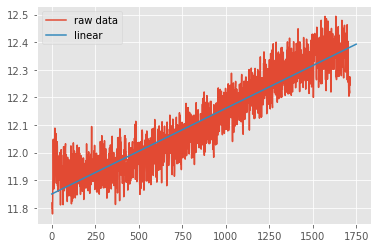

In [18]:
plt.plot(df["Time[s]"],df["Intensity[a.u.]"], label = "raw data")
x = np.arange(0,1750,0.01)
y = param[0] * x + param[1]
plt.plot(x,y,label="linear")
plt.legend()

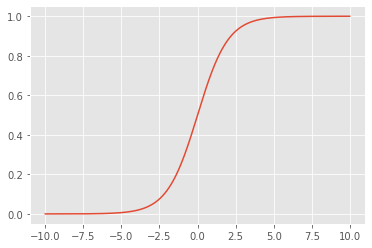

In [19]:
x = np.arange(-10,10,0.01)
y = 1.0 / (np.exp(-x) + 1.0)
plt.plot(x,y)

In [20]:
def nonlinear_fit(x,a,b,c,d):
    return a / (np.exp(-b*x + c) + 1.0) + d

In [22]:
param2, cov2 = curve_fit(nonlinear_fit, df["Time[s]"],df["Intensity[a.u.]"])

In [23]:
param2

array([-4.84020813e-01, -3.82954576e-03, -3.85352655e+00,  1.23968891e+01])

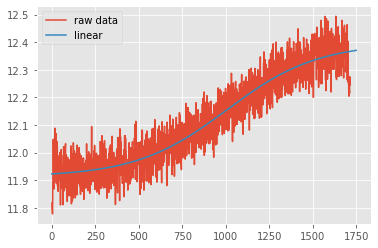

In [24]:
plt.plot(df["Time[s]"],df["Intensity[a.u.]"], label = "raw data")
x = np.arange(0,1750,0.01)
y = param2[0] / (np.exp(-param2[1]*x + param2[2]) + 1.0) + param2[3]
plt.plot(x,y,label="linear")
plt.legend()